In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
''' Esta classe permite armazenar uma quantidade arbitrária de variáveis 
    como atributos, semelhante ao tipo struct do matlab '''
class structtype():
    pass

In [3]:
img = cv2.imread('figs/lena.png',cv2.IMREAD_GRAYSCALE)

In [4]:
def convertVarFeat(img):
    data = structtype()
    data.img = np.array(img)
    data.imgSize = structtype()
    data.imgSize.lin, data.imgSize.col = data.img.shape
    
    return data

In [5]:
def filterMean(dados):
    dt = dados.img

    size = structtype()
    size.dt = structtype()
    size.dt.lin, size.dt.col = dt.shape

    dados.kernel = np.ones((dados.kernelSize, dados.kernelSize))
    central = m.floor((dados.kernelSize / 2))
    C = np.zeros((size.dt.lin + central * 2, size.dt.col + central * 2))
    C[(0 + central):(size.dt.lin + central), (0 + central):(size.dt.col + central)] = dt
    
    soma = 0;
    D = np.zeros(dt.shape)
    
    for j in range((0), size.dt.lin):
        for k in range((0), size.dt.col):
            # Run kernel in one matrix's elements
            for kl in range(0, dados.kernelSize):
                for kk in range(0, dados.kernelSize):
                    soma = (C[j + kl, k + kk] * dados.kernel[kl, kk]) + soma
            value = m.ceil((soma / (dados.kernelSize * dados.kernelSize)))
            soma = 0
            D[j, k] = value
    D = np.uint8(D)

    return D

In [6]:
dados = convertVarFeat(img)

# Parâmetros para o Filtro da média
# Kernel def:
dados.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

In [7]:
for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMean(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMean(dados)

Text(0.5, 1.0, 'Filtro da Média k=3x3:1x')

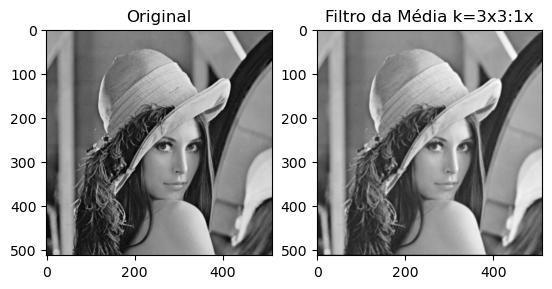

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[k,:,:], 'gray')
ax.set_title(f'Filtro da Média k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [10]:
sImg0 = np.array(img)
cv2.imwrite(f"output/original.png", sImg0)
sImg1 = np.array(U[0])
cv2.imwrite(f"output/mean_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x.png", sImg1)

True

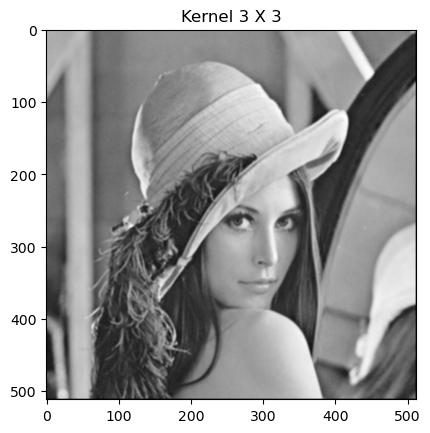

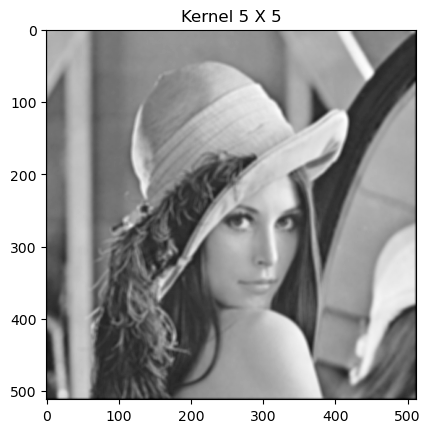

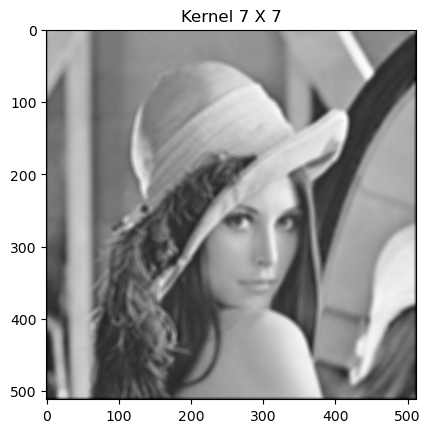

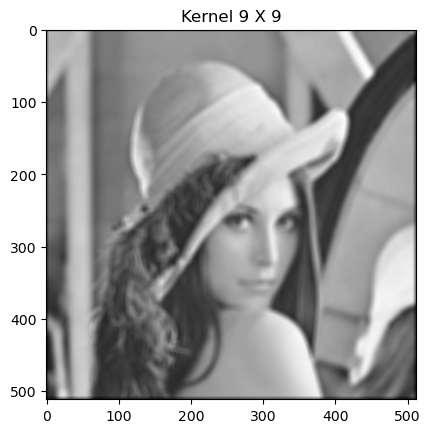

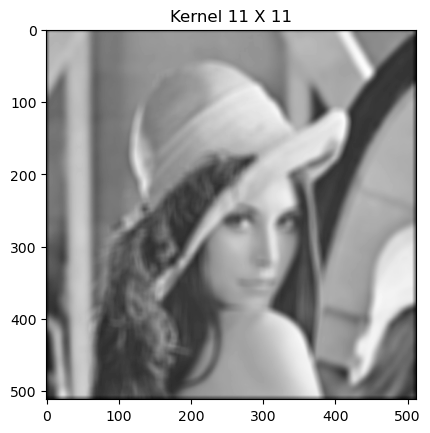

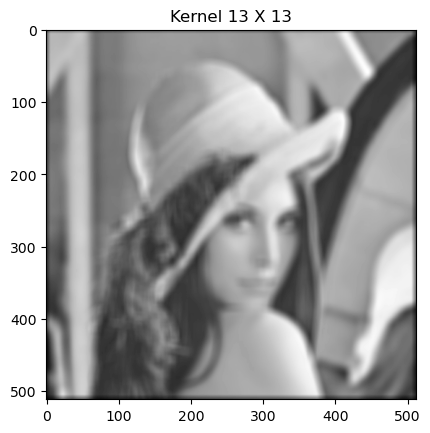

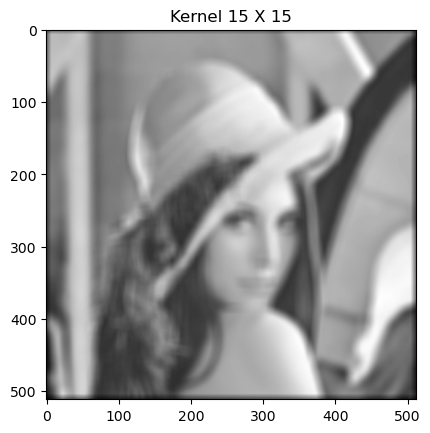

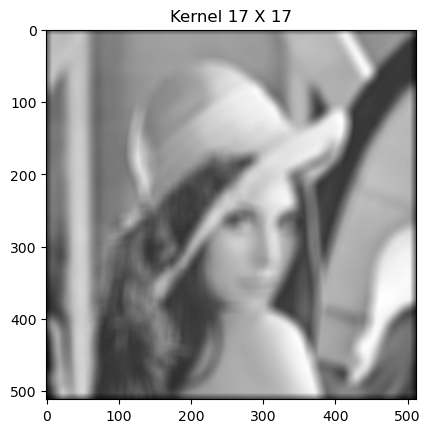

In [11]:
imagens = list()
kernels = list()
for i in range(3,19,2):
    dados.kernelSize = i
    kernels.append(dados.kernelSize)
    U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))
    for k in range(0, numAp):
        if k == 0:
            U[k,:,:] = filterMean(dados)
        else:
            dados.img = U[k-1,:,:]
            U[k,:,:] = filterMean(dados)
    imagens.append(U[(numAp - 1),:,:])
    
for i in range(len(imagens)):
    plt.figure()
    plt.imshow(imagens[i], 'gray')
    plt.title(f"Kernel {kernels[i]} X {kernels[i]}")
    plt.show()
    
    sImgX = np.array(imagens[i])
    cv2.imwrite(f"output/mean_output_kernel_{kernels[i]}x{kernels[i]}_aplicado_{numAp}x.png", sImgX)

In [12]:
img2 = cv2.imread('figs/test_pattern_blurring_orig.tif',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Filtro da Média k=3x3:50x')

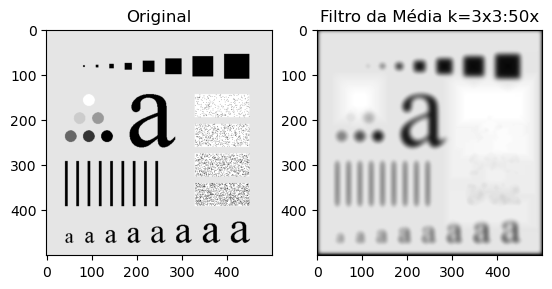

In [13]:
dados = convertVarFeat(img2)
dados.kernelSize = 3
numAp = 50;
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMean(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMean(dados)
        
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img2, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numAp - 1),:,:], 'gray')
ax.set_title(f'Filtro da Média k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [14]:
sImg2 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/mean_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x.png", sImg2)
sImg22 = np.array(img2)
cv2.imwrite(f"output/original2.png", sImg22)

True

In [15]:
img3 = cv2.imread('figs/ckt_board_saltpep_prob_pt05.tif',cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Filtro da Média k=3x3:5x')

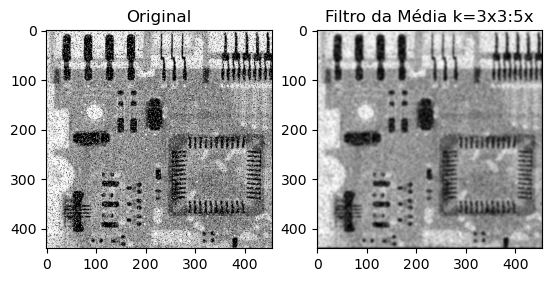

In [17]:
dados = convertVarFeat(img3)
dados.kernelSize = 3
numAp = 5;
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMean(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMean(dados)
        
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img3, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[k,:,:], 'gray')
ax.set_title(f'Filtro da Média k={dados.kernelSize}x{dados.kernelSize}:{numAp}x')

In [19]:
sImg3 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/mean_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x.png", sImg3)
sImg33 = np.array(img3)
cv2.imwrite(f"output/original2.png", sImg22)

True

Text(0.5, 1.0, 'Filtro da Média k=3x3:50x-lena')

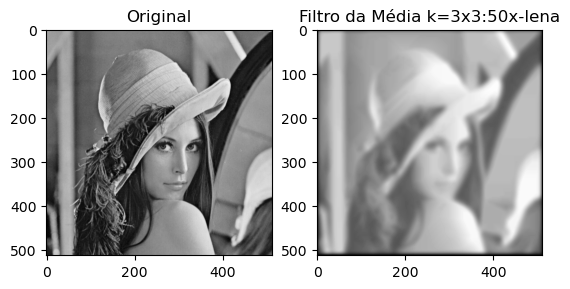

In [21]:
dados = convertVarFeat(img)
dados.kernelSize = 3
numAp = 50;
U = np.zeros((numAp, dados.imgSize.lin, dados.imgSize.col))

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = filterMean(dados)
    else:
        dados.img = U[k-1,:,:]
        U[k,:,:] = filterMean(dados)
        
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, 'gray')
ax.set_title('Original')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(U[(numAp - 1),:,:], 'gray')
ax.set_title(f'Filtro da Média k={dados.kernelSize}x{dados.kernelSize}:{numAp}x-lena')

In [22]:
sImg4 = np.array(U[(numAp - 1),:,:])
cv2.imwrite(f"output/mean_output_kernel_{dados.kernelSize}x{dados.kernelSize}_aplicado_{numAp}x-lena.png", sImg4)

True